<a href="https://colab.research.google.com/github/JoelKBenny/AI_Project_Data_Analytics/blob/main/Dogs_vs_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from kaggle

In [3]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
#extracting the zip file
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [5]:
#extracting the zip file
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [6]:
import os

In [7]:
#counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('no of Images :', file_count)

no of Images : 25000


Printing the name of images

In [8]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.8902.jpg', 'cat.6242.jpg', 'dog.11083.jpg', 'dog.2571.jpg', 'cat.10688.jpg', 'dog.12021.jpg', 'cat.86.jpg', 'cat.9925.jpg', 'cat.2745.jpg', 'dog.25.jpg', 'dog.7204.jpg', 'dog.5778.jpg', 'cat.4286.jpg', 'cat.4210.jpg', 'dog.6543.jpg', 'dog.5902.jpg', 'cat.8248.jpg', 'cat.11920.jpg', 'dog.5856.jpg', 'cat.2282.jpg', 'cat.12428.jpg', 'cat.1932.jpg', 'dog.12093.jpg', 'cat.4339.jpg', 'cat.4556.jpg', 'cat.1891.jpg', 'dog.3509.jpg', 'cat.2210.jpg', 'dog.10525.jpg', 'dog.1048.jpg', 'dog.10854.jpg', 'dog.2798.jpg', 'cat.1282.jpg', 'cat.9720.jpg', 'cat.1823.jpg', 'cat.7263.jpg', 'dog.7866.jpg', 'cat.7534.jpg', 'dog.1756.jpg', 'cat.2588.jpg', 'dog.11945.jpg', 'cat.7395.jpg', 'dog.8140.jpg', 'cat.2949.jpg', 'cat.10405.jpg', 'dog.10860.jpg', 'dog.11379.jpg', 'dog.12402.jpg', 'dog.229.jpg', 'dog.2059.jpg', 'cat.480.jpg', 'cat.398.jpg', 'cat.1543.jpg', 'dog.1790.jpg', 'dog.7678.jpg', 'cat.10008.jpg', 'dog.6899.jpg', 'cat.6128.jpg', 'cat.8658.jpg', 'dog.11104.jpg', 'dog.7097.jpg', 'dog.4437.jpg',

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying images of dogs and cats

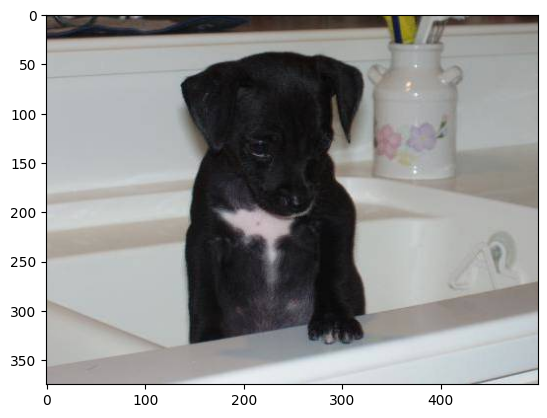

In [10]:
#dog
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplot = plt.imshow(img)
plt.show()

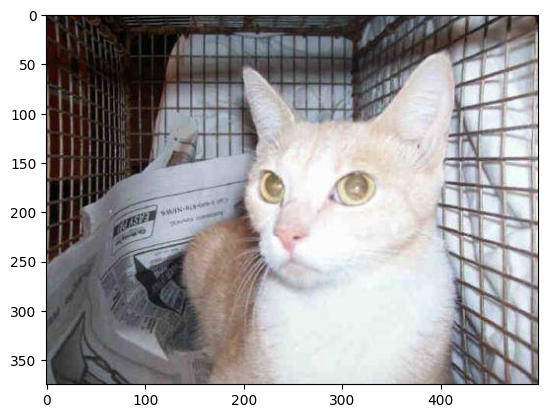

In [11]:
#cat
img = mpimg.imread('/content/train/cat.10548.jpg')
imgplot = plt.imshow(img)
plt.show()

In [12]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count+= 1
  else:
    cat_count+=1

print('Dog count : ',dog_count)
print('Cat+count : ',cat_count)

Dog count :  12500
Cat+count :  12500


Resizing the images


In [13]:
#creating a directory for resized
#os.mkdir('/content/image resized')

In [14]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  file_name = os.listdir(original_folder)[i]
  img_path = original_folder + file_name

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder + file_name
  img.save(newImgPath)

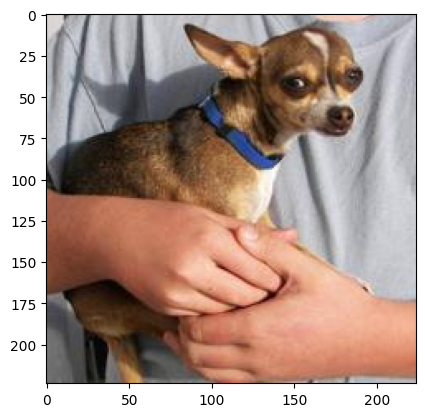

In [15]:
#display resized dog image

img = mpimg.imread('/content/image resized/dog.10062.jpg')
imgplot = plt.imshow(img)
plt.show()

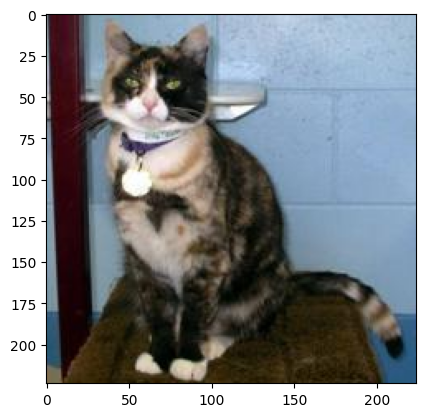

In [16]:
#display resized cat image

img = mpimg.imread('/content/image resized/cat.9999.jpg')
imgplot = plt.imshow(img)
plt.show()

In [17]:
#finding proportion in cats and dogs in resized image folder

file_names = os.listdir('/content/image resized')
dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count+= 1
  else:
    cat_count+=1

print('Dog count : ',dog_count)
print('Cat count : ',cat_count)

Dog count :  1007
Cat count :  993


**Creating labels for resized images**




Cat ---> 0

Dog ---> 1

In [18]:
# creating a for loop to assign labels
filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [19]:
print(filenames[0:5])

['dog.8902.jpg', 'cat.6242.jpg', 'dog.11083.jpg', 'dog.2571.jpg', 'cat.10688.jpg']


In [20]:
print(labels[0:5])

[1, 0, 1, 1, 0]


In [21]:
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[ 993 1007]


Converting all the resized images into numoy arrays.

In [22]:
import cv2
import glob

In [23]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' +e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [24]:
print(dog_cat_images)

[[[[  6  20  19]
   [ 16  30  29]
   [ 25  41  40]
   ...
   [157 177 188]
   [155 177 188]
   [156 178 189]]

  [[  6  20  19]
   [ 16  30  29]
   [ 23  39  38]
   ...
   [148 168 179]
   [151 171 182]
   [151 173 184]]

  [[ 17  31  30]
   [ 26  40  39]
   [ 31  47  46]
   ...
   [139 159 170]
   [144 164 175]
   [149 169 180]]

  ...

  [[ 25  25  65]
   [ 25  25  65]
   [ 25  24  66]
   ...
   [120 130 140]
   [117 127 137]
   [116 126 136]]

  [[ 24  25  63]
   [ 24  25  63]
   [ 24  24  64]
   ...
   [116 126 136]
   [113 123 133]
   [111 121 131]]

  [[ 23  25  60]
   [ 23  25  60]
   [ 23  24  62]
   ...
   [113 123 133]
   [109 119 129]
   [106 116 126]]]


 [[[242 238 220]
   [255 254 236]
   [255 253 239]
   ...
   [ 31  43  49]
   [ 33  45  51]
   [ 34  46  52]]

  [[232 228 210]
   [251 247 229]
   [255 252 238]
   ...
   [ 35  47  53]
   [ 37  47  54]
   [ 37  49  55]]

  [[222 218 200]
   [245 241 223]
   [253 250 236]
   ...
   [ 40  51  55]
   [ 42  51  55]
   [ 40  51

In [25]:
type(dog_cat_images)

numpy.ndarray

In [26]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [27]:
X = dog_cat_images
Y = np.asarray(labels)

TRAIN TEST SPLIT

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [30]:
#scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [31]:
print(X_train_scaled)

[[[[0.40392157 0.45882353 0.50588235]
   [0.41960784 0.4745098  0.52156863]
   [0.41960784 0.4745098  0.52156863]
   ...
   [0.14509804 0.20784314 0.37254902]
   [0.09803922 0.16470588 0.31764706]
   [0.14901961 0.21568627 0.36862745]]

  [[0.42745098 0.48235294 0.52941176]
   [0.42745098 0.48235294 0.52941176]
   [0.41176471 0.46666667 0.51372549]
   ...
   [0.14509804 0.20784314 0.37254902]
   [0.09803922 0.16470588 0.31764706]
   [0.14901961 0.21568627 0.36862745]]

  [[0.43921569 0.49019608 0.54509804]
   [0.42352941 0.4745098  0.52941176]
   [0.39607843 0.45098039 0.49803922]
   ...
   [0.14509804 0.20784314 0.37254902]
   [0.10196078 0.16862745 0.32156863]
   [0.15294118 0.21960784 0.37254902]]

  ...

  [[0.39215686 0.45490196 0.50588235]
   [0.47058824 0.53333333 0.58431373]
   [0.43137255 0.49411765 0.54117647]
   ...
   [0.54117647 0.61568627 0.64313725]
   [0.51764706 0.58823529 0.63137255]
   [0.44705882 0.51372549 0.56470588]]

  [[0.28627451 0.34509804 0.40784314]
   [0.4

**Building the neural network**

In [32]:
import tensorflow as tf
import tensorflow_hub as hub

In [33]:
 mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

 pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3  ), trainable = False)

In [34]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [35]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [36]:
model.fit(X_train_scaled, Y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 58s 1s/step - loss: 0.2477 - acc: 0.9044
Epoch 2/5
50/50 [==============================] - 54s 1s/step - loss: 0.0738 - acc: 0.9775
Epoch 3/5
50/50 [==============================] - 53s 1s/step - loss: 0.0518 - acc: 0.9862
Epoch 4/5
50/50 [==============================] - 52s 1s/step - loss: 0.0387 - acc: 0.9925
Epoch 5/5
50/50 [==============================] - 53s 1s/step - loss: 0.0320 - acc: 0.9925


In [37]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss : ', score)
print('Test Accuracy : ', acc)

13/13 [==============================] - 14s 1s/step - loss: 0.0431 - acc: 0.9775
Test Loss :  0.04310208931565285
Test Accuracy :  0.9775000214576721


**Predictive System**

Path of the image to be predicted : /content/dog.jpg


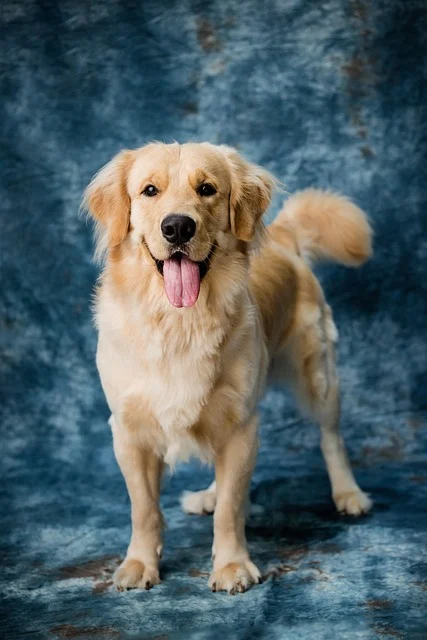

1/1 [==============================] - 1s 943ms/step
[[-2.952195  4.970035]]
1
The image represents a Dog


In [38]:
input_image_path = input('Path of the image to be predicted : ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resized/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')